In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [8]:
%run _functions.ipynb

In [4]:
save_files = 'files/Section7-ML-models'

In [5]:
save_img = 'docs/img/Section7-ML-models'

In [6]:
session_name = 'Section7-ML-models'

# Section VI. ML Models

## Load Saved Section if exists

## Load Data

In [5]:
# dicts
datasets_dict = loadit(
    'datasets_dict', dir='Section3-Feature-selection-and-Preprocessing')
features_dict = loadit(
    'features_dict', dir='Section4-Linear-models-research')
simulation_datasets_dict = loadit(
    'simulation_datasets_dict', dir='Section6-HPP-evaluation')
estimators_dict = loadit(
    'estimators_dict', dir='Section6-HPP-evaluation')
evaluation_dict = loadit(
    'evaluation_dict', dir='Section6-HPP-evaluation')

# datasets
train = datasets_dict['train_cv'].copy()
train_fit = datasets_dict['train'].copy()

# features
features = features_dict['features']
features_raw = features_dict['features_raw']
numeric = features_dict['numeric']
categorical = features_dict['categorical']
categorical_transform = features_dict['categorical_transform']
factor = features_dict['factor']
target = 'price'

## Datasets

In [6]:
train.shape

(1311, 106)

In [7]:
train[features].head()

,mssubclass,lg_lotfrontage,lg_lotarea,yearbuilt,lg_yearremodadd,lg_masvnrarea,lg_bsmtfinsf_first,lg_bsmtfinsf_second,lg_bsmtunfsf,lg_totalbsmtsf,...,lowqualfinsf_exst,second_flrsf_exst,garagearea_exst,wooddecksf_exst,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst
907,50,4.465908,9.350189,1936,7.594884,0.0,5.411646,0.0,6.678342,6.925595,...,0,1,1,0,0,0,0,1,0,0
782,20,4.219508,9.698061,2001,7.602401,0.0,0.000000,0.0,7.254178,7.254178,...,0,0,1,0,1,0,0,0,0,0
952,85,4.110874,8.881975,1972,7.602900,0.0,6.493754,0.0,4.691348,6.645091,...,0,0,1,1,0,0,0,0,0,0
620,30,3.828641,9.017847,1914,7.576097,0.0,3.737670,0.0,6.714171,6.762730,...,0,0,0,0,0,1,0,0,0,0
669,30,4.394449,9.358847,1922,7.576097,0.0,0.000000,0.0,6.552508,6.552508,...,0,0,1,0,0,1,0,0,0,0


In [8]:
train[features_raw].head()

,mssubclass,lg_lotfrontage,lg_lotarea,yearbuilt,lg_yearremodadd,lg_masvnrarea,lg_bsmtfinsf_first,lg_bsmtfinsf_second,lg_bsmtunfsf,lg_totalbsmtsf,...,masvnrtype,foundation,heating,centralair,electrical,paveddrive,fence,miscfeature,saletype,salecondition
907,50,4.465908,9.350189,1936,7.594884,0.0,5.411646,0.0,6.678342,6.925595,...,NA,CBlock,GasA,Y,SBrkr,Y,NA,NA,WD,Normal
782,20,4.219508,9.698061,2001,7.602401,0.0,0.000000,0.0,7.254178,7.254178,...,NA,PConc,GasA,Y,SBrkr,Y,NA,NA,WD,Normal
952,85,4.110874,8.881975,1972,7.602900,0.0,6.493754,0.0,4.691348,6.645091,...,NA,CBlock,GasA,Y,SBrkr,Y,MnPrv,NA,WD,Normal
620,30,3.828641,9.017847,1914,7.576097,0.0,3.737670,0.0,6.714171,6.762730,...,NA,BrkTil,GasA,N,FuseF,N,NA,NA,WD,Normal
669,30,4.394449,9.358847,1922,7.576097,0.0,0.000000,0.0,6.552508,6.552508,...,NA,BrkTil,GasA,Y,SBrkr,Y,NA,NA,WD,Normal


In [9]:
train[target]

907     12.429216
782     12.139399
952     11.804849
620     11.112448
669     11.831379
          ...    
1095    12.080691
1130    11.813030
1294    11.652687
860     12.154516
1126    12.066811
Name: price, Length: 1311, dtype: float64

In [10]:
datasets1 = [
    train[features],
    train[target]
]
datasets2 = [
    train[features_raw],
    train[target]
]

## Preprocessing Pipelines

In [11]:
encoder = OrdinalEncoder(
    encoding_method='ordered',
    variables=categorical_transform,
    missing_values='ignore',
    unseen='encode'
)

In [12]:
scaler = StandardScaler()

In [13]:
preprocessor = Pipeline([
    ('encoder', encoder),
    ('scaler', scaler),
])

In [14]:
preprocessor

Pipeline(steps=[('encoder',
                 OrdinalEncoder(missing_values='ignore', unseen='encode',
                                variables=['mszoning', 'street', 'alley',
                                           'lotshape', 'landcontour',
                                           'utilities', 'lotconfig',
                                           'landslope', 'neighborhood',
                                           'condition_first',
                                           'condition_second', 'bldgtype',
                                           'housestyle', 'roofstyle',
                                           'roofmatl', 'exterior_first',
                                           'exterior_second', 'masvnrtype',
                                           'foundation', 'heating',
                                           'centralair', 'electrical',
                                           'paveddrive', 'fence', 'miscfeature',
                                           'saletype', 'salecondition',
                                           'mssubclass'])),
                ('scaler', StandardScaler())])

In [15]:
n_folds = 20

In [16]:
params_knn = {
    'estimator__n_neighbors': [2, 3, 4, 5, 7, 10, 15],
    'estimator__weights': ['uniform']
}

In [17]:
params_svr = {
    'estimator__kernel': ['linear'],
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': [0.01, 0.1]
}

In [18]:
params_rf = {
    'estimator__n_estimators': [25, 50, 75, 100],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__random_state':[seed]
}

In [19]:
params_bag = {
    'estimator__n_estimators': [25, 50, 75, 100, 150, 200],
    'estimator__random_state':[seed]
}

In [20]:
params_lgb = {
    'estimator__n_estimators': [25, 50, 75, 100, 150, 200],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__num_leaves': [3, 25, 100, ],
    'estimator__learning_rate': [0.1, 0.3],
    'estimator__random_state':[seed],
    'estimator__verbose': [-1]
}

In [21]:
params_hgb = {
    'estimator__loss': ['squared_error'],
    'estimator__learning_rate': [0.1, 0.3],
    'estimator__max_iter': [100, 200, 300],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__random_state':[seed]
}

In [22]:
params_xgb = {
    'estimator__n_estimators': [25, 50, 75, 100, 150, 200],
    'estimator__max_depth': [2, 3, 4, 5, 7, 10],
    'estimator__random_state':[seed],
    'estimator__learning_rate': [0.1, 0.3],
}

In [23]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', KNeighborsRegressor())
])

pipeline_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', SVR())
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', RandomForestRegressor())
])

pipeline_bag = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', BaggingRegressor())
])

pipeline_lgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', LGBMRegressor())
])

pipeline_hgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', HistGradientBoostingRegressor())
])

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', XGBRegressor())
])

In [24]:
models_list = [
    'KNN', 'SVM', 'RF', 'Bagging',
    'LGBoost', 'HGBoost', 'XGBoost'
]

In [25]:
estimators_list = [
    pipeline_knn, pipeline_svr, pipeline_rf, pipeline_bag,
    pipeline_lgb, pipeline_hgb, pipeline_xgb
]

In [26]:
params_list = [
    params_knn, params_svr, params_rf, params_bag,
    params_lgb, params_hgb, params_xgb
]

## Part 1. Train Data with new predictors

In [27]:
st = stopwatch.start()
results_grid1, cv_dict1 = models_evaluation(
    X=train[features],
    y=train[target],
    names=models_list,
    estimators=estimators_list,
    parameters=params_list,
    n_folds=20,
    full_results=True
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 1:35:29


In [28]:
results_grid1

,Model,MeanScore,StdScore,FitTime,StdFitTime,ScoreTime,StdScoreTime,HyperSearchTime,TotalTime,BestEstimator
0,SVM,-0.114657,0.019492,0.607232,0.091940,0.044550,0.007932,0:38:17,1:35:29,"((OrdinalEncoder(missing_values='ignore', unse..."
1,LGBoost,-0.120204,0.027586,0.164013,0.004520,0.041461,0.003465,0:15:28,1:35:29,"((OrdinalEncoder(missing_values='ignore', unse..."
2,HGBoost,-0.120407,0.024204,0.430129,0.005143,0.043650,0.003431,0:10:23,1:35:29,"((OrdinalEncoder(missing_values='ignore', unse..."
3,XGBoost,-0.121548,0.023911,0.278771,0.007652,0.049528,0.001838,0:14:19,1:35:29,"((OrdinalEncoder(missing_values='ignore', unse..."
4,Bagging,-0.132469,0.026399,5.613951,0.206116,0.062062,0.003639,0:07:50,1:35:29,"((OrdinalEncoder(missing_values='ignore', unse..."
5,RF,-0.134011,0.026277,2.988283,0.165518,0.043395,0.006222,0:08:51,1:35:29,"((OrdinalEncoder(missing_values='ignore', unse..."
6,KNN,-0.174617,0.027281,0.081352,0.008318,0.040611,0.005236,0:00:20,1:35:29,"((OrdinalEncoder(missing_values='ignore', unse..."


In [29]:
results_grid1.iloc[:, :7]

,Model,MeanScore,StdScore,FitTime,StdFitTime,ScoreTime,StdScoreTime
0,SVM,-0.114657,0.019492,0.607232,0.091940,0.044550,0.007932
1,LGBoost,-0.120204,0.027586,0.164013,0.004520,0.041461,0.003465
2,HGBoost,-0.120407,0.024204,0.430129,0.005143,0.043650,0.003431
3,XGBoost,-0.121548,0.023911,0.278771,0.007652,0.049528,0.001838
4,Bagging,-0.132469,0.026399,5.613951,0.206116,0.062062,0.003639
5,RF,-0.134011,0.026277,2.988283,0.165518,0.043395,0.006222
6,KNN,-0.174617,0.027281,0.081352,0.008318,0.040611,0.005236


In [30]:
results_estimators1 = (results_grid1['BestEstimator']
                      .map(lambda x: x.named_steps['estimator']).tolist())

In [31]:
results_estimators1

[SVR(C=0.1, gamma=0.01, kernel='linear'),
 LGBMRegressor(max_depth=2, n_estimators=200, num_leaves=3, random_state=42,
               verbose=-1),
 HistGradientBoostingRegressor(max_depth=2, max_iter=300, random_state=42),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 BaggingRegressor(n_estim

In [32]:
params_best_dict1 = {}

In [33]:
for name, estimator in zip(results_grid1['Model'], results_estimators1):
    params_best_dict1[name] = estimator.get_params()

Image 'fit_time_new.png' successfully saved into 'img/Section7-ML-models' directory


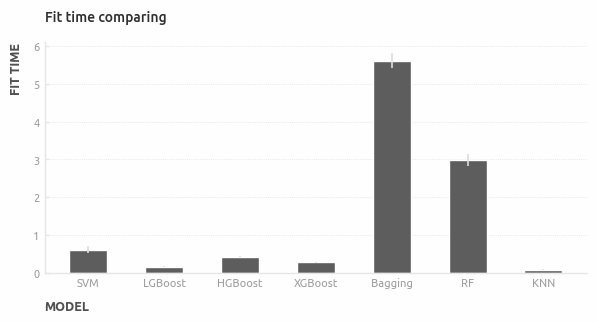

In [34]:
fig = plt.figure(figsize=(7,3))
sns.barplot(
    x=results_grid1['Model'],
    y=results_grid1['FitTime'],
    width=0.5,
    color=palette[0]
)
plt.errorbar(
    x=results_grid1['Model'],
    y=results_grid1['FitTime'],
    yerr=results_grid1['StdFitTime'],
    linestyle='none',
    color=palette[-1]
)
plt.xlabel(str.upper('model'), fontsize=9)
plt.ylabel(str.upper('fit time'), fontsize=9)
# f.suptitle('Fit time comparing', weight='bold', x=0.159, y=1, fontsize=10)
plt.title('Fit time comparing', loc='left', fontsize=10)

## Voting And Stacking estimators

In [35]:
estimator_knn1 = KNeighborsRegressor(**params_best_dict1['KNN'])
estimator_svr1 = SVR(**params_best_dict1['SVM'])
estimator_rf1 = RandomForestRegressor(**params_best_dict1['RF'])
estimator_bag1 = BaggingRegressor(**params_best_dict1['Bagging'])
estimator_lgb1 = LGBMRegressor(**params_best_dict1['LGBoost'])
estimator_hgb1 = HistGradientBoostingRegressor(**params_best_dict1['HGBoost'])
estimator_xgb1 = XGBRegressor(**params_best_dict1['XGBoost'])

In [36]:
estimators1 = [
    ('SVM', estimator_svr1),
    ('RF', estimator_rf1),
    ('Bagging', estimator_bag1),
    ('LGBoost', estimator_lgb1),
    ('HGBoost', estimator_hgb1),
    ('XGBoost', estimator_xgb1)
]

### Voting Regressor 

In [37]:
estimator_vote1 = VotingRegressor(estimators=estimators1)

In [38]:
estimator_vote1

VotingRegressor(estimators=[('SVM', SVR(C=0.1, gamma=0.01, kernel='linear')),
                            ('RF',
                             RandomForestRegressor(max_depth=10,
                                                   random_state=42)),
                            ('Bagging',
                             BaggingRegressor(n_estimators=150,
                                              random_state=42)),
                            ('LGBoost',
                             LGBMRegressor(max_depth=2, n_estimators=200,
                                           num_leaves=3, random_state=42,
                                           verbose=-1)),
                            ('HGBoost',
                             HistGradientBoostingRegressor(max_depth=2,
                                                           max_i...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=2,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...))])

In [39]:
pipeline_vote = Pipeline(steps=[
    ('encoding', encoder),
    ('scaler', scaler),
    ('vote', estimator_vote1)
])

In [40]:
st = stopwatch.start()
estimator_vote1_cv = cross_validate(
    pipeline_vote, *datasets1, cv=n_folds,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:03:25


In [41]:
estimator_vote1_scores_mean = np.mean(estimator_vote1_cv['test_score'])

In [42]:
estimator_vote1_scores_mean

-0.11602169888115783

In [43]:
estimator_vote1_scores_std = np.std(estimator_vote1_cv['test_score'], ddof=1)

In [44]:
estimator_vote1_scores_std

0.025669608977595366

In [45]:
estimator_vote1_fit_time_mean = np.mean(estimator_vote1_cv['fit_time'])

In [46]:
estimator_vote1_fit_time_mean

9.80712332725525

In [47]:
estimator_vote1_fit_time_std = np.std(estimator_vote1_cv['fit_time'], ddof=1)

In [48]:
estimator_vote1_fit_time_std

0.39106896702270644

### Stacking Regressor

In [49]:
final_estimator1 = RidgeCV()

In [50]:
estimator_stack1 = StackingRegressor(
    estimators=estimators1,
    final_estimator=final_estimator1)

In [51]:
estimator_stack1

StackingRegressor(estimators=[('SVM', SVR(C=0.1, gamma=0.01, kernel='linear')),
                              ('RF',
                               RandomForestRegressor(max_depth=10,
                                                     random_state=42)),
                              ('Bagging',
                               BaggingRegressor(n_estimators=150,
                                                random_state=42)),
                              ('LGBoost',
                               LGBMRegressor(max_depth=2, n_estimators=200,
                                             num_leaves=3, random_state=42,
                                             verbose=-1)),
                              ('HGBoost',
                               HistGradientBoostingRegressor(max_depth=2,
                                                             max...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=2,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=RidgeCV())

In [52]:
pipeline_stack = Pipeline(steps=[
    ('encoding', encoder),
    ('scaler', scaler),
    ('stack', estimator_stack1)
])

In [53]:
st = stopwatch.start()
estimator_stack1_cv = cross_validate(
    pipeline_stack, *datasets1, cv=n_folds,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:16:40


In [54]:
estimator_stack1_scores_mean = np.mean(estimator_stack1_cv['test_score'])

In [55]:
estimator_stack1_scores_mean

-0.11171694012697231

In [56]:
estimator_stack1_scores_std = np.std(estimator_stack1_cv['test_score'], ddof=1)

In [57]:
estimator_stack1_scores_std

0.02234245441993257

In [58]:
estimator_stack1_fit_time_mean = np.mean(estimator_stack1_cv['fit_time'])

In [59]:
estimator_stack1_fit_time_mean

49.557216823101044

In [60]:
estimator_stack1_fit_time_std = np.std(estimator_stack1_cv['fit_time'], ddof=1)

In [61]:
estimator_stack1_fit_time_std

3.8716275005763467

### Compare estimators

In [62]:
plot_vote_stack11 = pd.DataFrame(
    data=estimator_vote1_cv['test_score'],
    columns=['Voting']
)
plot_vote_stack12 = pd.DataFrame(
    data=estimator_stack1_cv['test_score'],
    columns=['Stacking']
)
plot_vote_stack1 = pd.concat([plot_vote_stack11, plot_vote_stack12], axis=1)

In [63]:
plot_vote_stack1.head()

,Voting,Stacking
0,-0.160236,-0.151825
1,-0.120275,-0.123477
2,-0.105924,-0.108313
3,-0.077123,-0.079305
4,-0.140171,-0.134565


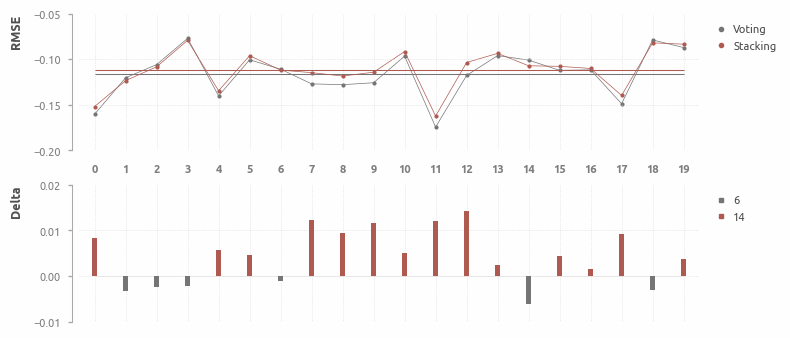

Images 'vote_stack_compare_new.png' and 'vote_stack_compare_new.svg' successfully saved into 'docs/img/Section7-ML-models' directory


In [9]:
fig = plot_estimators_comparing(
    data=plot_vote_stack1,
    labels=['Voting', 'Stacking'],
    ylabels=['RMSE', 'Delta'],
    kind='bar',
    figsize=(8, 4),
    width=0.15,
    palette=[alpha_color(palette[0], 0.85), palette[1]],
    ax0_y_ticks=[-0.20, -0.05, 0.05],
    ax1_y_ticks=[-0.010, 0.015, 0.01]
    
)
savefig('vote_stack_compare_new', save_img)

In [65]:
# create df with results
results_full_cols = [
    'Model', 'MeanScore', 'StdScore', 'FitTime', 'StdFitTime'
]	
results_full1 = results_grid1[results_full_cols].copy()
results_full1['MeanScore'] = results_full1['MeanScore'].abs() 
results_full1['Estimator'] = results_estimators1 

In [66]:
# add scores of vote and stacking regressors
vote_row = [
    'Voting',
    np.abs(estimator_vote1_scores_mean),
    estimator_vote1_scores_std,
    estimator_vote1_fit_time_mean,
    estimator_vote1_fit_time_std,
    estimator_vote1
]
stack_row = [
    'Stacking',
    np.abs(estimator_stack1_scores_mean),
    estimator_stack1_scores_std,
    estimator_stack1_fit_time_mean,
    estimator_stack1_fit_time_std,
    estimator_stack1
]

In [67]:
results_full1.loc[len(results_full1)] = vote_row
results_full1.loc[len(results_full1)] = stack_row

results_full1 = results_full1.sort_values('MeanScore', ascending=True)
results_full1 = results_full1.reset_index(drop=True)

In [68]:
# calculate CI and margin of errors
results_full1['CiMin'] = results_full1.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['min'],
    axis=1)

results_full1['CiMax'] = results_full1.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['max'],
    axis=1)

results_full1['MarginOfError'] = results_full1.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['margin'],
    axis=1)

# move 'Estimator' column to last position
old_cols = results_full1.columns
new_cols = [col for col in old_cols if col != 'Estimator'] + ['Estimator']
results_full1 = results_full1[new_cols].copy()

In [69]:
results_full1

,Model,MeanScore,StdScore,FitTime,StdFitTime,CiMin,CiMax,MarginOfError,Estimator
0,Stacking,0.111717,0.022342,49.557217,3.871628,0.101260,0.122174,0.010457,"StackingRegressor(estimators=[('SVM', SVR(C=0...."
1,SVM,0.114657,0.019492,0.607232,0.091940,0.105534,0.123779,0.009123,"SVR(C=0.1, gamma=0.01, kernel='linear')"
2,Voting,0.116022,0.025670,9.807123,0.391069,0.104008,0.128035,0.012014,"VotingRegressor(estimators=[('SVM', SVR(C=0.1,..."
3,LGBoost,0.120204,0.027586,0.164013,0.004520,0.107293,0.133115,0.012911,"LGBMRegressor(max_depth=2, n_estimators=200, n..."
4,HGBoost,0.120407,0.024204,0.430129,0.005143,0.109080,0.131735,0.011328,"HistGradientBoostingRegressor(max_depth=2, max..."
5,XGBoost,0.121548,0.023911,0.278771,0.007652,0.110358,0.132739,0.011191,"XGBRegressor(base_score=None, booster=None, ca..."
6,Bagging,0.132469,0.026399,5.613951,0.206116,0.120114,0.144824,0.012355,(DecisionTreeRegressor(random_state=1952926171...
7,RF,0.134011,0.026277,2.988283,0.165518,0.121713,0.146309,0.012298,"(DecisionTreeRegressor(max_depth=10, max_featu..."
8,KNN,0.174617,0.027281,0.081352,0.008318,0.161849,0.187385,0.012768,KNeighborsRegressor(n_neighbors=15)


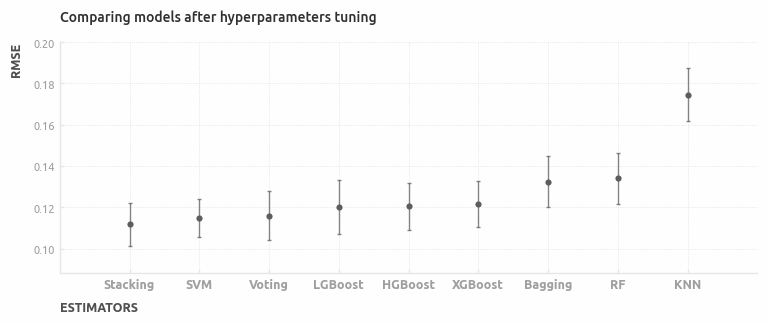

In [70]:
f = plt.figure(figsize=(9,3))
plt.scatter(
    x=results_full1['Model'],
    y=results_full1['MeanScore'],
    s=30
)
plt.errorbar(
    x=results_full1['Model'],
    y=results_full1['MeanScore'],
    yerr=results_full1['MarginOfError'],
    elinewidth=1,
    capsize=1.5,
    capthick=1,
    linestyle='none',
    alpha=0.75
)
ylim_delta = 2*results_full1['MarginOfError'].max()
ylim_min = results_full1['CiMin'].min() - 0.5*ylim_delta
ylim_max = results_full1['CiMax'].max() + 0.5*ylim_delta
plt.xlim(-1, len(results_full1))
plt.ylim(ylim_min, ylim_max)
plt.xticks(fontsize=9, weight='bold')
plt.ylabel(str.upper('rmse'))
plt.xlabel(str.upper('estimators'))
plt.title(
    'Comparing models after hyperparameters tuning', loc='left')
plt.show()

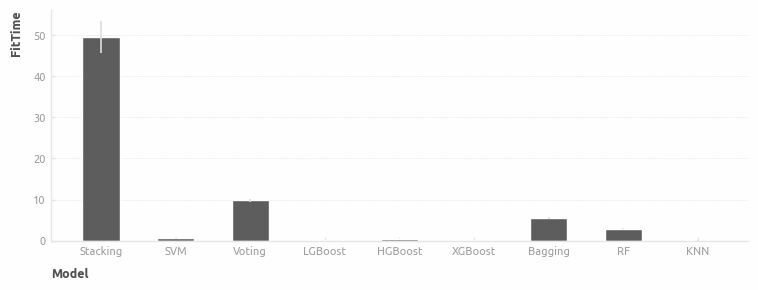

In [71]:
plt.figure(figsize=(9,3))
sns.barplot(
    x=results_full1['Model'],
    y=results_full1['FitTime'],
    width=0.5,
    color=palette[0]
)
plt.errorbar(
    x=results_full1['Model'],
    y=results_full1['FitTime'],
    yerr=results_full1['StdFitTime'],
    linestyle='none',
    color=palette[-1]
)
plt.show()

## Part 2. Train Data without New Predictors

In [72]:
st = stopwatch.start()
results_grid2, cv_dict2 = models_evaluation(
    X=train[features_raw],
    y=train[target],
    names=models_list,
    estimators=estimators_list,
    parameters=params_list,
    n_folds=20,
    full_results=True
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 1:20:31


In [73]:
results_grid2

,Model,MeanScore,StdScore,FitTime,StdFitTime,ScoreTime,StdScoreTime,HyperSearchTime,TotalTime,BestEstimator
0,SVM,-0.117609,0.017543,0.501347,0.064139,0.046143,0.006798,0:23:13,1:20:31,"((OrdinalEncoder(missing_values='ignore', unse..."
1,HGBoost,-0.118362,0.023832,0.527692,0.084247,0.049298,0.009265,0:10:59,1:20:31,"((OrdinalEncoder(missing_values='ignore', unse..."
2,LGBoost,-0.119566,0.023849,0.178143,0.037595,0.043298,0.005232,0:17:31,1:20:31,"((OrdinalEncoder(missing_values='ignore', unse..."
3,XGBoost,-0.120786,0.020643,0.495160,0.059735,0.052868,0.004936,0:14:24,1:20:31,"((OrdinalEncoder(missing_values='ignore', unse..."
4,Bagging,-0.134981,0.027072,5.178789,0.398840,0.076393,0.015686,0:06:52,1:20:31,"((OrdinalEncoder(missing_values='ignore', unse..."
5,RF,-0.136660,0.027193,2.602295,0.370086,0.057516,0.026089,0:07:09,1:20:31,"((OrdinalEncoder(missing_values='ignore', unse..."
6,KNN,-0.174142,0.026302,0.084264,0.007848,0.043494,0.006136,0:00:23,1:20:31,"((OrdinalEncoder(missing_values='ignore', unse..."


In [74]:
results_estimators2 = (results_grid2['BestEstimator']
                      .map(lambda x: x.named_steps['estimator']).tolist())

In [75]:
results_estimators2

[SVR(C=0.1, gamma=0.01, kernel='linear'),
 HistGradientBoostingRegressor(max_depth=2, max_iter=300, random_state=42),
 LGBMRegressor(max_depth=2, n_estimators=200, num_leaves=25, random_state=42,
               verbose=-1),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 BaggingRegressor(n_esti

In [76]:
params_best_dict2 = {}

In [77]:
for name, estimator in zip(results_grid2['Model'], results_estimators2):
    params_best_dict2[name] = estimator.get_params()

Image 'fit_time_orig.png' successfully saved into 'img/Section7-ML-models' directory


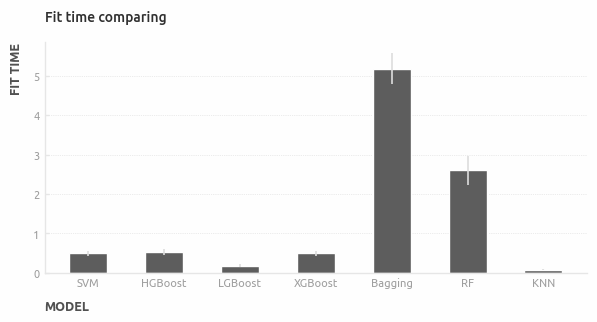

In [78]:
fig = plt.figure(figsize=(7,3))
sns.barplot(
    x=results_grid2['Model'],
    y=results_grid2['FitTime'],
    width=0.5,
    color=palette[0]
)
plt.errorbar(
    x=results_grid2['Model'],
    y=results_grid2['FitTime'],
    yerr=results_grid2['StdFitTime'],
    linestyle='none',
    color=palette[-1]
)
plt.xlabel(str.upper('model'), fontsize=9)
plt.ylabel(str.upper('fit time'), fontsize=9)
plt.title('Fit time comparing', loc='left', fontsize=10)

## Voting And Stacking estimators

In [79]:
estimator_knn2 = KNeighborsRegressor(**params_best_dict2['KNN'])
estimator_svr2 = SVR(**params_best_dict2['SVM'])
estimator_rf2 = RandomForestRegressor(**params_best_dict2['RF'])
estimator_bag2 = BaggingRegressor(**params_best_dict2['Bagging'])
estimator_lgb2 = LGBMRegressor(**params_best_dict2['LGBoost'])
estimator_hgb2 = HistGradientBoostingRegressor(**params_best_dict2['HGBoost'])
estimator_xgb2 = XGBRegressor(**params_best_dict2['XGBoost'])

In [80]:
estimators2 = [
    ('SVM', estimator_svr2),
    ('RF', estimator_rf2),
    ('Bagging', estimator_bag2),
    ('LGBoost', estimator_lgb2),
    ('HGBoost', estimator_hgb2),
    ('XGBoost', estimator_xgb2)
]

### Voting Regressor 

In [81]:
estimator_vote2 = VotingRegressor(estimators=estimators2)

In [82]:
estimator_vote2

VotingRegressor(estimators=[('SVM', SVR(C=0.1, gamma=0.01, kernel='linear')),
                            ('RF',
                             RandomForestRegressor(max_depth=10,
                                                   random_state=42)),
                            ('Bagging',
                             BaggingRegressor(n_estimators=150,
                                              random_state=42)),
                            ('LGBoost',
                             LGBMRegressor(max_depth=2, n_estimators=200,
                                           num_leaves=25, random_state=42,
                                           verbose=-1)),
                            ('HGBoost',
                             HistGradientBoostingRegressor(max_depth=2,
                                                           max_...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...))])

In [83]:
pipeline_vote2 = Pipeline(steps=[
    ('encoding', encoder),
    ('scaler', scaler),
    ('vote', estimator_vote2)
])

In [84]:
st = stopwatch.start()
estimator_vote2_cv = cross_validate(
    pipeline_vote2, *datasets2, cv=n_folds,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:03:04


In [85]:
estimator_vote2_scores_mean = np.mean(estimator_vote2_cv['test_score'])

In [86]:
estimator_vote2_scores_mean

-0.11630788870908385

In [87]:
estimator_vote2_scores_std = np.std(estimator_vote2_cv['test_score'], ddof=1)

In [88]:
estimator_vote2_scores_std

0.024406739707932282

In [89]:
estimator_vote2_fit_time_mean = np.mean(estimator_vote2_cv['fit_time'])

In [90]:
estimator_vote2_fit_time_mean

8.72186462879181

In [91]:
estimator_vote2_fit_time_std = np.std(estimator_vote2_cv['fit_time'], ddof=1)

In [92]:
estimator_vote2_fit_time_std

0.6834346883105661

### Stacking Regressor

In [93]:
final_estimator2 = RidgeCV()

In [94]:
estimator_stack2 = StackingRegressor(
    estimators=estimators2,
    final_estimator=final_estimator2)

In [95]:
estimator_stack2

StackingRegressor(estimators=[('SVM', SVR(C=0.1, gamma=0.01, kernel='linear')),
                              ('RF',
                               RandomForestRegressor(max_depth=10,
                                                     random_state=42)),
                              ('Bagging',
                               BaggingRegressor(n_estimators=150,
                                                random_state=42)),
                              ('LGBoost',
                               LGBMRegressor(max_depth=2, n_estimators=200,
                                             num_leaves=25, random_state=42,
                                             verbose=-1)),
                              ('HGBoost',
                               HistGradientBoostingRegressor(max_depth=2,
                                                             ma...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=RidgeCV())

In [96]:
pipeline_stack2 = Pipeline(steps=[
    ('encoding', encoder),
    ('scaler', scaler),
    ('stack', estimator_stack2)
])

In [97]:
st = stopwatch.start()
estimator_stack2_cv = cross_validate(
    pipeline_stack2, *datasets2, cv=n_folds,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:14:48


In [98]:
estimator_stack2_scores_mean = np.mean(estimator_stack2_cv['test_score'])

In [99]:
estimator_stack2_scores_mean

-0.1114760410372539

In [100]:
estimator_stack2_scores_std = np.std(estimator_stack2_cv['test_score'], ddof=1)

In [101]:
estimator_stack2_scores_std

0.021144717332511012

In [102]:
estimator_stack2_fit_time_mean = np.mean(estimator_stack2_cv['fit_time'])

In [103]:
estimator_stack2_fit_time_mean

43.934728384017944

In [104]:
estimator_stack2_fit_time_std = np.std(estimator_stack2_cv['fit_time'], ddof=1)

In [105]:
estimator_stack2_fit_time_std

2.5297275433945776

### Compare estimators

In [106]:
plot_vote_stack21 = pd.DataFrame(
    data=estimator_vote2_cv['test_score'],
    columns=['Voting']
)
plot_vote_stack22 = pd.DataFrame(
    data=estimator_stack2_cv['test_score'],
    columns=['Stacking']
)
plot_vote_stack2 = pd.concat([plot_vote_stack21, plot_vote_stack22], axis=1)

In [107]:
plot_vote_stack2.head()

,Voting,Stacking
0,-0.156775,-0.147111
1,-0.121551,-0.117125
2,-0.101644,-0.108163
3,-0.074974,-0.074047
4,-0.138760,-0.131761


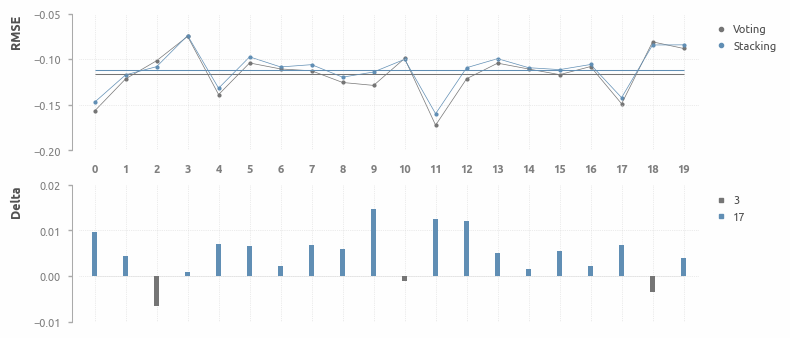

Images 'vote_stack_compare_orig.png' and 'vote_stack_compare_orig.svg' successfully saved into 'docs/img/Section7-ML-models' directory


In [10]:
fig = plot_estimators_comparing(
    data=plot_vote_stack2,
    labels=['Voting', 'Stacking'],
    ylabels=['RMSE', 'Delta'],
    kind='bar',
    figsize=(8, 4),
    width=0.15,
    palette=[alpha_color(palette[0], 0.85), palette[2]],
    ax0_y_ticks=[-0.20, -0.05, 0.05],
    ax1_y_ticks=[-0.010, 0.015, 0.01]
)
savefig('vote_stack_compare_orig', save_img)

In [109]:
# create df with results
results_full_cols = [
    'Model', 'MeanScore', 'StdScore', 'FitTime', 'StdFitTime'
]	
results_full2 = results_grid2[results_full_cols].copy()
results_full2['MeanScore'] = results_full2['MeanScore'].abs() 
results_full2['Estimator'] = results_estimators2

In [110]:
# add scores of vote and stacking regressors
vote_row = [
    'Voting',
    np.abs(estimator_vote2_scores_mean),
    estimator_vote2_scores_std,
    estimator_vote2_fit_time_mean,
    estimator_vote2_fit_time_std,
    estimator_vote2
]
stack_row = [
    'Stacking',
    np.abs(estimator_stack2_scores_mean),
    estimator_stack2_scores_std,
    estimator_stack2_fit_time_mean,
    estimator_stack2_fit_time_std,
    estimator_stack2
]

In [111]:
results_full2.loc[len(results_full2)] = vote_row
results_full2.loc[len(results_full2)] = stack_row

results_full2 = results_full2.sort_values('MeanScore', ascending=True)
results_full2 = results_full2.reset_index(drop=True)

In [112]:
# calculate CI and margin of errors
results_full2['CiMin'] = results_full2.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['min'],
    axis=1)

results_full2['CiMax'] = results_full2.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['max'],
    axis=1)

results_full2['MarginOfError'] = results_full2.apply(
    lambda x: ci_t_distribution(
        mean=x['MeanScore'], std=x['StdScore'], n=n_folds)['margin'],
    axis=1)
# move 'Estimator' column to last position
old_cols = results_full2.columns
new_cols = [col for col in old_cols if col != 'Estimator'] + ['Estimator']
results_full2 = results_full2[new_cols].copy()

In [113]:
results_full2

,Model,MeanScore,StdScore,FitTime,StdFitTime,CiMin,CiMax,MarginOfError,Estimator
0,Stacking,0.111476,0.021145,43.934728,2.529728,0.101580,0.121372,0.009896,"StackingRegressor(estimators=[('SVM', SVR(C=0...."
1,Voting,0.116308,0.024407,8.721865,0.683435,0.104885,0.127731,0.011423,"VotingRegressor(estimators=[('SVM', SVR(C=0.1,..."
2,SVM,0.117609,0.017543,0.501347,0.064139,0.109399,0.125820,0.008211,"SVR(C=0.1, gamma=0.01, kernel='linear')"
3,HGBoost,0.118362,0.023832,0.527692,0.084247,0.107208,0.129515,0.011154,"HistGradientBoostingRegressor(max_depth=2, max..."
4,LGBoost,0.119566,0.023849,0.178143,0.037595,0.108404,0.130727,0.011162,"LGBMRegressor(max_depth=2, n_estimators=200, n..."
5,XGBoost,0.120786,0.020643,0.495160,0.059735,0.111125,0.130447,0.009661,"XGBRegressor(base_score=None, booster=None, ca..."
6,Bagging,0.134981,0.027072,5.178789,0.398840,0.122311,0.147651,0.012670,(DecisionTreeRegressor(random_state=1952926171...
7,RF,0.136660,0.027193,2.602295,0.370086,0.123934,0.149387,0.012727,"(DecisionTreeRegressor(max_depth=10, max_featu..."
8,KNN,0.174142,0.026302,0.084264,0.007848,0.161832,0.186451,0.012310,KNeighborsRegressor(n_neighbors=15)


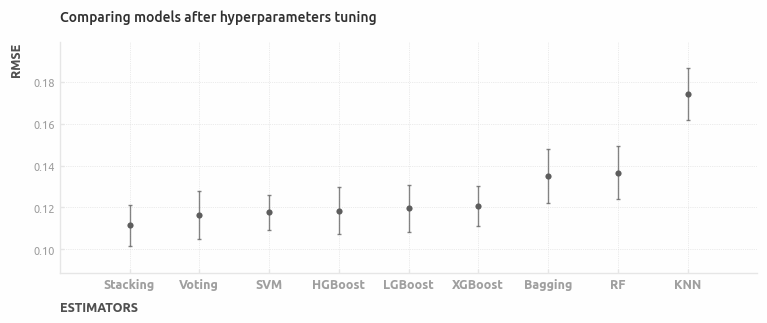

In [114]:
f = plt.figure(figsize=(9,3))
plt.scatter(
    x=results_full2['Model'],
    y=results_full2['MeanScore'],
    s=30
)
plt.errorbar(
    x=results_full2['Model'],
    y=results_full2['MeanScore'],
    yerr=results_full2['MarginOfError'],
    elinewidth=1,
    capsize=1.2,
    capthick=1,
    linestyle='none',
    alpha=0.75
)
ylim_delta = 2*results_full2['MarginOfError'].max()
ylim_min = results_full2['CiMin'].min() - 0.5*ylim_delta
ylim_max = results_full2['CiMax'].max() + 0.5*ylim_delta
plt.xlim(-1, len(results_full2))
plt.ylim(ylim_min, ylim_max)
plt.xticks(fontsize=9, weight='bold')
plt.ylabel(str.upper('rmse'))
plt.xlabel(str.upper('estimators'))
plt.title(
    'Comparing models after hyperparameters tuning', loc='left')
plt.show()

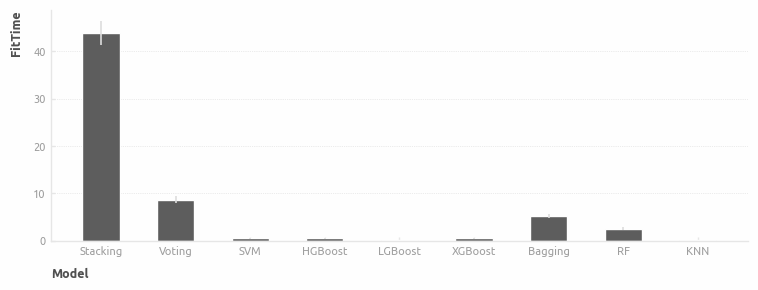

In [115]:
plt.figure(figsize=(9,3))
sns.barplot(
    x=results_full2['Model'],
    y=results_full2['FitTime'],
    width=0.5,
    color=palette[0]
)
plt.errorbar(
    x=results_full2['Model'],
    y=results_full2['FitTime'],
    yerr=results_full2['StdFitTime'],
    linestyle='none',
    color=palette[-1]
)
plt.show()

## Results

In [116]:
results_full1_ = results_full1[['Model', 'MeanScore', 'MarginOfError', 'FitTime']].copy()
results_full2_ = results_full2[['Model', 'MeanScore', 'MarginOfError', 'FitTime']].copy()

In [117]:
for col in results_full1_.columns[1:]:
    results_full1_ = results_full1_.rename(columns={col: col+'_new'})

for col in results_full2_.columns[1:]:
    results_full2_ = results_full2_.rename(columns={col: col+'_original'})

In [118]:
results = results_full1_.merge(results_full2_, on='Model')

In [119]:
results

,Model,MeanScore_new,MarginOfError_new,FitTime_new,MeanScore_original,MarginOfError_original,FitTime_original
0,Stacking,0.111717,0.010457,49.557217,0.111476,0.009896,43.934728
1,SVM,0.114657,0.009123,0.607232,0.117609,0.008211,0.501347
2,Voting,0.116022,0.012014,9.807123,0.116308,0.011423,8.721865
3,LGBoost,0.120204,0.012911,0.164013,0.119566,0.011162,0.178143
4,HGBoost,0.120407,0.011328,0.430129,0.118362,0.011154,0.527692
5,XGBoost,0.121548,0.011191,0.278771,0.120786,0.009661,0.495160
6,Bagging,0.132469,0.012355,5.613951,0.134981,0.012670,5.178789
7,RF,0.134011,0.012298,2.988283,0.136660,0.012727,2.602295
8,KNN,0.174617,0.012768,0.081352,0.174142,0.012310,0.084264


In [120]:
results_columns_new = [
    'Model', 'MeanScore_new', 'MeanScore_original',
    'MarginOfError_new', 'MarginOfError_original',
    'FitTime_new', 'FitTime_original'
]

In [121]:
results = results[results_columns_new]

In [122]:
results

,Model,MeanScore_new,MeanScore_original,MarginOfError_new,MarginOfError_original,FitTime_new,FitTime_original
0,Stacking,0.111717,0.111476,0.010457,0.009896,49.557217,43.934728
1,SVM,0.114657,0.117609,0.009123,0.008211,0.607232,0.501347
2,Voting,0.116022,0.116308,0.012014,0.011423,9.807123,8.721865
3,LGBoost,0.120204,0.119566,0.012911,0.011162,0.164013,0.178143
4,HGBoost,0.120407,0.118362,0.011328,0.011154,0.430129,0.527692
5,XGBoost,0.121548,0.120786,0.011191,0.009661,0.278771,0.495160
6,Bagging,0.132469,0.134981,0.012355,0.012670,5.613951,5.178789
7,RF,0.134011,0.136660,0.012298,0.012727,2.988283,2.602295
8,KNN,0.174617,0.174142,0.012768,0.012310,0.081352,0.084264


In [123]:
xtickslabels = [
    'Stacking', 'SVM', 'Voting', 'LGBoost', 'HGBoost',
    'XGBoost', 'Bagging', 'RF', 'KNN']
xticks_ft = np.arange(1, len(results['Model'])+1)
results_delta = 0.08
x1 = xticks_ft + results_delta
x2 = xticks_ft - results_delta

y1 = results['MeanScore_new'].tolist()
y2 = results['MeanScore_original'].tolist()

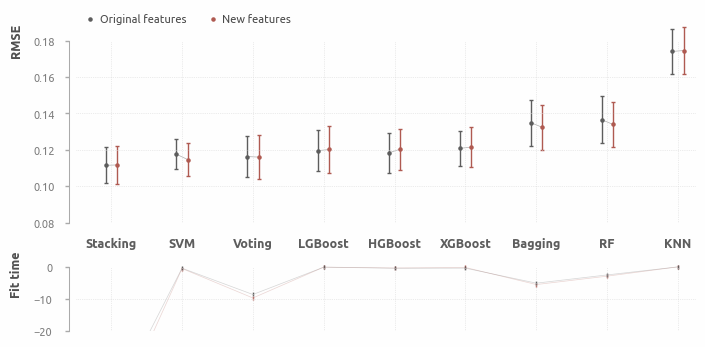

Images 'ml_models_plot.png' and 'ml_models_plot.svg' successfully saved into 'docs/img/Section7-ML-models' directory


In [11]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4), height_ratios=[2.5, 1])

# feaures plot
plt.subplot(2,1,1)

# AX0
# original features
ax[0].scatter(
    x=x2,
    y=y2,
    label='Original features',
    s=5,
    color=palette[0],
    zorder=5
)
ax[0].errorbar(
    x=x2,
    y=y2,
    yerr=results['MarginOfError_original'],
    elinewidth=1,
    capsize=1.5,
    capthick=1,
    linestyle='none',
    color=palette[0]
)
# new features
ax[0].scatter(
    x=x1,
    y=y1,
    label='New features',
    s=5,
    color=palette[1],
    zorder=5
)
ax[0].errorbar(
    x=x1,
    y=y1,
    yerr=results['MarginOfError_new'],
    elinewidth=1,
    capsize=1.1,
    capthick=1,
    linestyle='none',
    color=palette[1]
)
# connection lines
ax[0].plot([x1,x2], [y1,y2], lw=0.5, color=palette[0], alpha=0.5)
# spines
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_position(('outward', 5))
ax[0].spines['left'].set_color('#AAAAAA')
ax[0].spines['left'].set_bounds(0.08, 0.18)
ax[0].spines['left'].set_linewidth(0.75)
# ticks parameters
ax[0].tick_params(
    bottom=False, direction='out', pad=11, color='#AAAAAA', labelcolor='#808080')
ax[0].tick_params(axis='y', pad=7)
ax[0].tick_params(axis='x', pad=7)
# xticks and limits
ax0_xticks = np.arange(1, 10)
ax[0].set_xticks(ax0_xticks)
ax[0].set_xticklabels(
    xtickslabels, weight='bold', fontsize=9, color=palette[0])
ax[0].set_xlim(0.5, 9.25)
# yticks and limits
ax0_yticks = arange(0.08, 0.18, 0.02, True)
ax[0].set_yticks(ax0_yticks)
ax[0].set_ylim(0.08, 0.19)
# ylabel
ax[0].set_ylabel('RMSE')
# grid false
ax[0].grid(False)
# generate grid
# horizontal lines
for i in ax0_yticks[1:-1]:
    ax[0].hlines(
        i, ax[0].get_xlim()[0], ax[0].get_xlim()[-1],
        lw=0.5, ls=':', color='0.85')
# vertical lines
for i in ax0_xticks:
    ax[0].vlines(
        i, ax[0].get_ylim()[0], ax0_yticks[-1],
        lw=0.5, ls=':', color='0.85')

# AX1
plt.subplot(2,1,2)
ax[1].scatter(
    x=xticks_ft, y=-results['FitTime_new'],
    marker='|', s=10, lw=1, color=palette[1], alpha=1
)
ax[1].scatter(
    x=xticks_ft, y=-results['FitTime_original'],
    marker='|', s=10, lw=1, color=palette[0], alpha=1
)
# connection lines
ax[1].plot(
    xticks_ft, -results['FitTime_new'],
    lw=0.5, color=palette[1], alpha=0.25)
ax[1].plot(
    xticks_ft, -results['FitTime_original'],
    lw=0.5, color=palette[0], alpha=0.25)
# set visible top xaxis and hide bottom xaxis
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_position(('outward', 5))
ax[1].spines['left'].set_color('#AAAAAA')
ax[1].spines['left'].set_bounds(-20, 0)
ax[1].spines['left'].set_linewidth(0.75)
# xticks parameters
ax[1].tick_params(
    top=False, bottom=False, labeltop=False, labelbottom=False,
    direction='out', pad=9, color='#AAAAAA', labelcolor='#808080')
# xticks and limits
ax1_xticks = np.arange(1, 10)
ax[1].set_xticks(ax1_xticks)
ax[1].set_xticklabels(
    xtickslabels, weight='bold', fontsize=9, color='0.4')
ax[1].set_xlim(0.5, 9.25)
# yticks and limits
ax1_yticks = arange(-20, 0, 10, True)
ax[1].set_yticks(ax1_yticks)
ax[1].set_ylim(-20, 5)
# ylabel
ax[1].set_ylabel('Fit time')
# grid false
ax[1].grid(False)
# generate grid
# horizontal lines
for i in ax1_yticks[1:-1]:
    ax[1].hlines(i, ax[1].get_xlim()[0], ax[1].get_xlim()[-1], lw=0.5, ls=':', color='0.85')
# vertical lines
for i in ax1_xticks:
    ax[1].vlines(i, ax[1].get_ylim()[0], ax1_yticks[-1], lw=0.5, ls=':', color='0.85')
# legend
ax[0].legend(
    ncols=2, bbox_to_anchor=(0, 0.94), loc='lower left', frameon=False,
    fontsize=8, alignment='left', markerscale=1,
    handletextpad=0.5, handlelength=0.75, scatteryoffsets=[0.5]
)
# adjust
plt.subplots_adjust(hspace=0.2)
plt.show()

savefig('ml_models_plot', save_img)

### Save Data

In [125]:
stack = StackingRegressor(
    estimators=estimators2,
    final_estimator=final_estimator2)

In [126]:
stack.fit(train_fit[features_raw], train_fit[target])

StackingRegressor(estimators=[('SVM', SVR(C=0.1, gamma=0.01, kernel='linear')),
                              ('RF',
                               RandomForestRegressor(max_depth=10,
                                                     random_state=42)),
                              ('Bagging',
                               BaggingRegressor(n_estimators=150,
                                                random_state=42)),
                              ('LGBoost',
                               LGBMRegressor(max_depth=2, n_estimators=200,
                                             num_leaves=25, random_state=42,
                                             verbose=-1)),
                              ('HGBoost',
                               HistGradientBoostingRegressor(max_depth=2,
                                                             ma...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=RidgeCV())

In [127]:
params_svr = params_best_dict1['SVM']

In [128]:
svr = SVR(**params_svr)

In [129]:
svr.fit(train_fit[features], train_fit[target])

SVR(C=0.1, gamma=0.01, kernel='linear')

In [130]:
simulation_datasets_dict['train_ml'] = train_fit
simulation_datasets_dict['features_ml_stack'] = features_raw
simulation_datasets_dict['features_ml_svr'] = features

In [131]:
estimators_dict['stack_ml'] = stack
estimators_dict['svr_ml'] = svr

In [132]:
evaluation_dict['cv_stack_ml'] = estimator_stack2_cv
evaluation_dict['cv_svr_ml'] = cv_dict1['SVM']

In [133]:
saveit(simulation_datasets_dict, 'simulation_datasets_dict', save_files)

In [134]:
saveit(estimators_dict, 'estimators_dict', save_files)

In [135]:
saveit(evaluation_dict, 'evaluation_dict', save_files)

### Save Session

In [12]:
save_session(session_name)

### Execution time

In [137]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 3:35:13
